In [154]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import imghdr

In [111]:
#configuring gpus
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [112]:
data_dir = 'data'

In [113]:
image_exts = ['jpeg','jpg','bmp','png']

In [114]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path) #check for a valid image
            tip = imghdr.what(image_path) # check for a valid image extension
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path) #delete unwanted images
        except Exception as e:
                print('Issue with image {}'.format(image_path))

In [115]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 138 files belonging to 2 classes.


In [116]:
data_iterator =  data.as_numpy_iterator()
batch =  data_iterator.next()

In [117]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [118]:
#class 1 = woman
#class 0 = man
batch[1]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

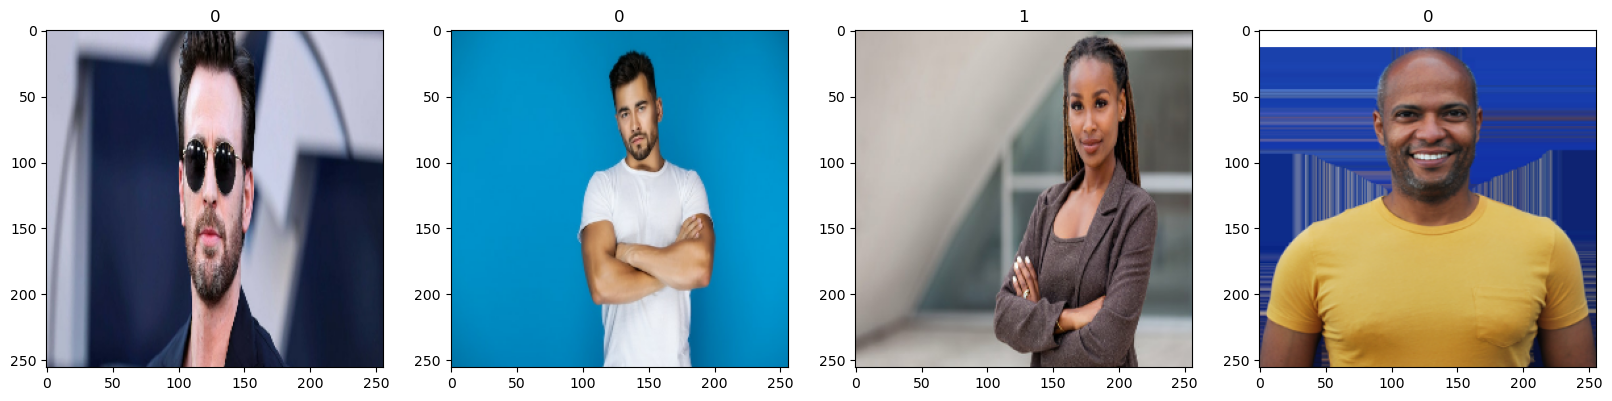

In [119]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [120]:
data = data.map(lambda x,y: (x/255, y))

In [121]:
len(data)

5

In [122]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) 
test_size = int(len(data)*.1) + 1
train_size + val_size + test_size

5

In [123]:
train_size

3

In [124]:
val_size

1

In [125]:
test_size

1

In [126]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [128]:
model = Sequential()

#adding layers for deep neural networks
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [129]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [130]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

In [131]:
logdir = 'logs'

In [132]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [133]:
#training model
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 4s 813ms/step - loss: 0.8999 - accuracy: 0.4479 - val_loss: 0.6760 - val_accuracy: 0.6562
Epoch 2/20
3/3 [==============================] - 3s 773ms/step - loss: 0.7127 - accuracy: 0.4375 - val_loss: 0.6772 - val_accuracy: 0.5938
Epoch 3/20
3/3 [==============================] - 3s 769ms/step - loss: 0.6921 - accuracy: 0.5625 - val_loss: 0.6821 - val_accuracy: 0.8125
Epoch 4/20
3/3 [==============================] - 3s 743ms/step - loss: 0.6798 - accuracy: 0.7083 - val_loss: 0.6518 - val_accuracy: 0.6562
Epoch 5/20
3/3 [==============================] - 3s 771ms/step - loss: 0.6636 - accuracy: 0.6146 - val_loss: 0.6323 - val_accuracy: 0.8125
Epoch 6/20
3/3 [==============================] - 3s 729ms/step - loss: 0.6281 - accuracy: 0.7812 - val_loss: 0.6218 - val_accuracy: 0.6250
Epoch 7/20
3/3 [==============================] - 3s 762ms/step - loss: 0.5919 - accuracy: 0.7292 - val_loss: 0.5763 - val_accuracy: 0.6250
Epoch 8/20
3/3 [====

In [134]:
hist.history

{'loss': [0.8998673558235168,
  0.7127068042755127,
  0.6920638084411621,
  0.6798388361930847,
  0.6635847687721252,
  0.6281499862670898,
  0.5919246673583984,
  0.5658838152885437,
  0.5049400925636292,
  0.4655044972896576,
  0.42551326751708984,
  0.3461814820766449,
  0.27898141741752625,
  0.24162817001342773,
  0.19221444427967072,
  0.1271444708108902,
  0.1196766197681427,
  0.11149240285158157,
  0.0724477767944336,
  0.08329525589942932],
 'accuracy': [0.4479166567325592,
  0.4375,
  0.5625,
  0.7083333134651184,
  0.6145833134651184,
  0.78125,
  0.7291666865348816,
  0.625,
  0.7916666865348816,
  0.8125,
  0.84375,
  0.8958333134651184,
  0.9270833134651184,
  0.9375,
  0.9479166865348816,
  0.9791666865348816,
  0.9791666865348816,
  0.96875,
  0.9895833134651184,
  0.9583333134651184],
 'val_loss': [0.6760410070419312,
  0.6771938800811768,
  0.6821049451828003,
  0.6517977714538574,
  0.6323440074920654,
  0.6217701435089111,
  0.5763323903083801,
  0.5052074790000916

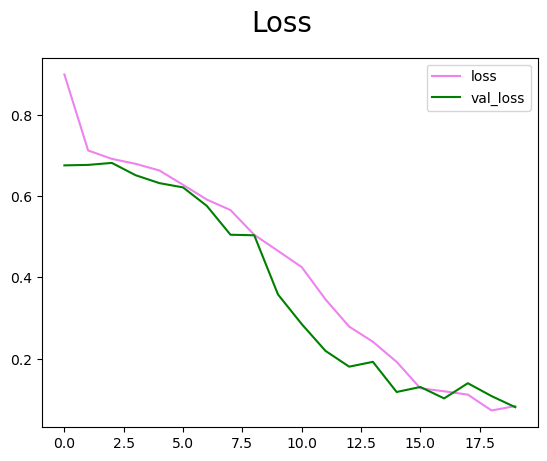

In [135]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='violet', label='loss')
plt.plot(hist.history['val_loss'], color='green', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

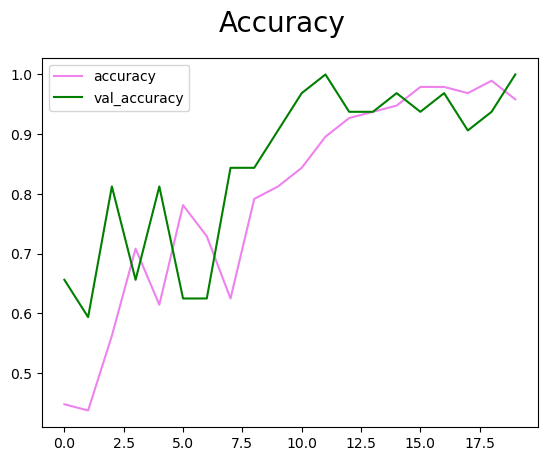

In [136]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='violet', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='green', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [137]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [138]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [139]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 468ms/step


In [140]:
print(f'Precision:{pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision:1.0, Recall: 1.0, Accuracy: 1.0


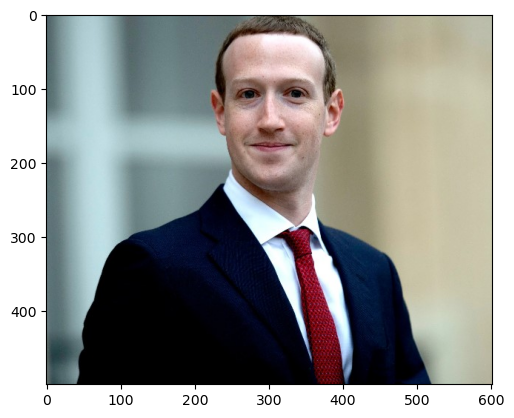

In [141]:
man_imgTest = cv2.imread('man_test3.jpg')
plt.imshow(cv2.cvtColor(man_imgTest, cv2.COLOR_BGR2RGB))
plt.show()

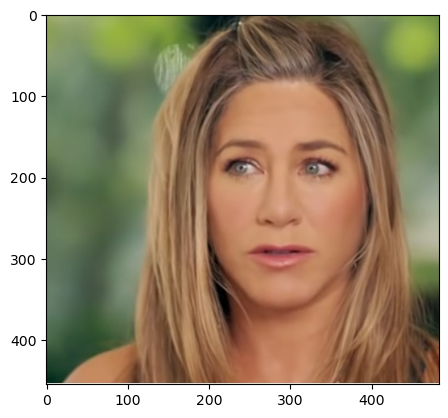

In [142]:
woman_imgTest = cv2.imread('woman_test3.jpg')
plt.imshow(cv2.cvtColor(woman_imgTest, cv2.COLOR_BGR2RGB))
plt.show()

In [143]:
man_resize = tf.image.resize(man_imgTest, (256,256))
woman_resize = tf.image.resize(woman_imgTest, (256,256))

In [144]:
man_yhat = model.predict(np.expand_dims(man_resize/255,0))
woman_yhat = model.predict(np.expand_dims(woman_resize/255,0))

1/1 [==============================] - 0s 20ms/step


In [145]:
woman_yhat

array([[0.55663407]], dtype=float32)

In [146]:
man_yhat

array([[0.07521409]], dtype=float32)

In [147]:
if woman_yhat > 0.5: 
    print(f'Predicted class is woman')
else:
    print(f'Predicted class is man')

Predicted class is woman


In [148]:
if man_yhat > 0.5: 
    print(f'Predicted class is woman')
else:
    print(f'Predicted class is man')

Predicted class is man


In [149]:
from tensorflow.keras.models import load_model

In [150]:
#saving trained model
model.save(os.path.join('models','imageclassifier.h5'))

In [151]:
new_model = load_model('models/imageclassifier.h5')

In [152]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 68ms/step


array([[0.07521409]], dtype=float32)